# Import required libraries

In [12]:
# pip install seaborn
# pip install xgboost
# pip install keras
# pip install sklearn
# pip install pandas
# pip install numpy

In [13]:
import pandas as pd

In [14]:
#  !pip install seaborn
#  !pip install xgboost
#  !pip install keras
#  !pip install sklearn
#  !pip install pandas
#  !pip install numpy


In [15]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

# Import the data

In [16]:
# help(pd.read_excel)

In [17]:
# df_x = pd.read_excel('Research data sample.xlsx', sheet_name = 'Sheet1')

In [18]:
df_x = pd.read_excel('Research data1.xlsx', sheet_name = 'Sheet1')

In [19]:
df_x.head(2)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
df_x.columns

Index(['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6',
       'Column7', 'Column8', 'Column9', 'Column10', 'Column11', 'Column12',
       'Column13', 'Column14', 'Column15', 'Column16', 'Column17', 'Column18',
       'Column19', 'Column20', 'Column21'],
      dtype='object')

In [21]:
# df_y = pd.read_excel('Research data sample.xlsx', sheet_name = 'Sheet2')

In [22]:
df_y = pd.read_excel('Research data1.xlsx', sheet_name = 'Sheet2')

In [23]:
df_y.head(2)

,Column1
0,66.193
1,66.193


In [24]:
df_y = df_y.rename(columns={'Column1': 'Position'})

In [25]:
df_y.head(2)

,Position
0,66.193
1,66.193


In [26]:
# df_all = df_x
# df_all['Position'] = df_y['Position'].values

In [27]:
# df_all.head(2)

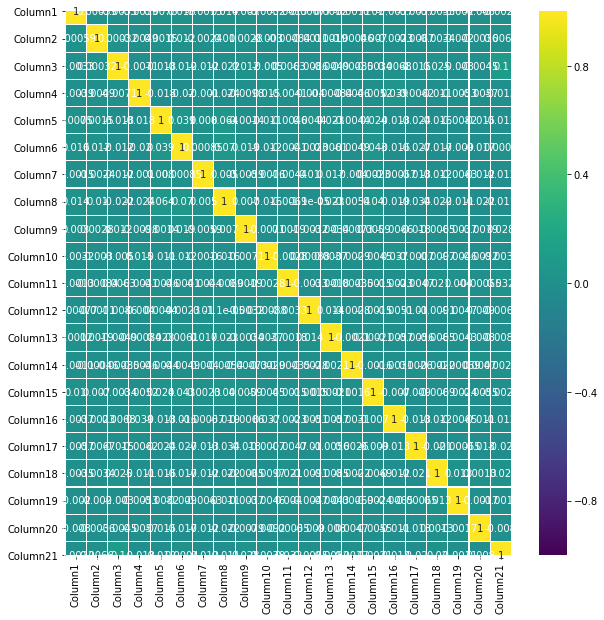

In [28]:
df_kor = df_x.corr()
plt.figure(figsize=(10,10))
sb.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

In [29]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [30]:
train_x.head(2)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
339610,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125963,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [31]:
train_x.shape[1]

21

# Trying a Deep Neural Network

In [32]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(256, kernel_initializer='normal',input_dim = train_x.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               5632      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 48,897
Trainable params: 48,897
Non-trainable params: 0
_________________________________________________________________


In [33]:
checkpoint_name = 'models/Weights-001--65.865790.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [34]:
callbacks_list

In [35]:
train = train_x.to_numpy()

In [36]:
train.shape

(583706, 21)

In [37]:
target = train_y.to_numpy()

In [38]:
target.shape

(583706, 1)

In [39]:
NN_model.fit(train, target, epochs=500, batch_size=64, validation_split = 0.2, callbacks=callbacks_list)

Train on 466964 samples, validate on 116742 samples
Epoch 1/500
466964/466964 [==============================] - 31s 67us/step - loss: 66.9768 - mean_absolute_error: 66.9770 - val_loss: 65.9166 - val_mean_absolute_error: 65.9166

Epoch 00001: val_loss improved from inf to 65.91657, saving model to models/Weights-001--65.91199.hdf5
Epoch 2/500
466964/466964 [==============================] - 32s 70us/step - loss: 65.8835 - mean_absolute_error: 65.8834 - val_loss: 65.9235 - val_mean_absolute_error: 65.9235

Epoch 00002: val_loss did not improve from 65.91657
Epoch 3/500
466964/466964 [==============================] - 32s 68us/step - loss: 65.8400 - mean_absolute_error: 65.8400 - val_loss: 65.8481 - val_mean_absolute_error: 65.8482

Epoch 00003: val_loss improved from 65.91657 to 65.84812, saving model to models/Weights-001--65.91199.hdf5
Epoch 4/500
466964/466964 [==============================] - 33s 71us/step - loss: 65.8014 - mean_absolute_error: 65.8013 - val_loss: 66.0187 - val_mea

466964/466964 [==============================] - 26s 56us/step - loss: 65.5920 - mean_absolute_error: 65.5921 - val_loss: 65.7502 - val_mean_absolute_error: 65.7502

Epoch 00034: val_loss did not improve from 65.74467
Epoch 35/500
466964/466964 [==============================] - 24s 51us/step - loss: 65.5934 - mean_absolute_error: 65.5933 - val_loss: 65.7591 - val_mean_absolute_error: 65.7591

Epoch 00035: val_loss did not improve from 65.74467
Epoch 36/500
466964/466964 [==============================] - 21s 45us/step - loss: 65.5983 - mean_absolute_error: 65.5983 - val_loss: 65.7312 - val_mean_absolute_error: 65.7313

Epoch 00036: val_loss improved from 65.74467 to 65.73124, saving model to models/Weights-001--65.91199.hdf5
Epoch 37/500
466964/466964 [==============================] - 24s 52us/step - loss: 65.5970 - mean_absolute_error: 65.5970 - val_loss: 65.7481 - val_mean_absolute_error: 65.7481

Epoch 00037: val_loss did not improve from 65.73124
Epoch 38/500
466964/466964 [=====

466964/466964 [==============================] - 19s 41us/step - loss: 65.5609 - mean_absolute_error: 65.5609 - val_loss: 65.7439 - val_mean_absolute_error: 65.7440

Epoch 00069: val_loss did not improve from 65.73124
Epoch 70/500
466964/466964 [==============================] - 19s 40us/step - loss: 65.5589 - mean_absolute_error: 65.5588 - val_loss: 65.8338 - val_mean_absolute_error: 65.8339

Epoch 00070: val_loss did not improve from 65.73124
Epoch 71/500
466964/466964 [==============================] - 19s 41us/step - loss: 65.5555 - mean_absolute_error: 65.5555 - val_loss: 65.7546 - val_mean_absolute_error: 65.7546

Epoch 00071: val_loss did not improve from 65.73124
Epoch 72/500
466964/466964 [==============================] - 19s 41us/step - loss: 65.5600 - mean_absolute_error: 65.5600 - val_loss: 65.7872 - val_mean_absolute_error: 65.7872

Epoch 00072: val_loss did not improve from 65.73124
Epoch 73/500
466964/466964 [==============================] - 17s 37us/step - loss: 65.55

466964/466964 [==============================] - 18s 39us/step - loss: 65.5471 - mean_absolute_error: 65.5471 - val_loss: 65.7763 - val_mean_absolute_error: 65.7762

Epoch 00104: val_loss did not improve from 65.72955
Epoch 105/500
466964/466964 [==============================] - 20s 43us/step - loss: 65.5476 - mean_absolute_error: 65.5475 - val_loss: 65.7523 - val_mean_absolute_error: 65.7523

Epoch 00105: val_loss did not improve from 65.72955
Epoch 106/500
466964/466964 [==============================] - 18s 38us/step - loss: 65.5406 - mean_absolute_error: 65.5405 - val_loss: 65.8545 - val_mean_absolute_error: 65.8545

Epoch 00106: val_loss did not improve from 65.72955
Epoch 107/500
466964/466964 [==============================] - 17s 37us/step - loss: 65.5473 - mean_absolute_error: 65.5474 - val_loss: 65.7343 - val_mean_absolute_error: 65.7343

Epoch 00107: val_loss did not improve from 65.72955
Epoch 108/500
466964/466964 [==============================] - 17s 37us/step - loss: 6

466964/466964 [==============================] - 18s 38us/step - loss: 65.5412 - mean_absolute_error: 65.5413 - val_loss: 65.7603 - val_mean_absolute_error: 65.7603

Epoch 00139: val_loss did not improve from 65.72818
Epoch 140/500
466964/466964 [==============================] - 18s 39us/step - loss: 65.5342 - mean_absolute_error: 65.5342 - val_loss: 65.7865 - val_mean_absolute_error: 65.7866

Epoch 00140: val_loss did not improve from 65.72818
Epoch 141/500
466964/466964 [==============================] - 18s 38us/step - loss: 65.5398 - mean_absolute_error: 65.5397 - val_loss: 65.8911 - val_mean_absolute_error: 65.8911

Epoch 00141: val_loss did not improve from 65.72818
Epoch 142/500
466964/466964 [==============================] - 18s 39us/step - loss: 65.5426 - mean_absolute_error: 65.5426 - val_loss: 65.7712 - val_mean_absolute_error: 65.7713

Epoch 00142: val_loss did not improve from 65.72818
Epoch 143/500
466964/466964 [==============================] - 18s 39us/step - loss: 6

466964/466964 [==============================] - 20s 42us/step - loss: 65.5299 - mean_absolute_error: 65.5300 - val_loss: 65.7415 - val_mean_absolute_error: 65.7415

Epoch 00174: val_loss did not improve from 65.72484
Epoch 175/500
466964/466964 [==============================] - 19s 41us/step - loss: 65.5318 - mean_absolute_error: 65.5317 - val_loss: 65.7406 - val_mean_absolute_error: 65.7406

Epoch 00175: val_loss did not improve from 65.72484
Epoch 176/500
466964/466964 [==============================] - 20s 42us/step - loss: 65.5315 - mean_absolute_error: 65.5314 - val_loss: 65.7680 - val_mean_absolute_error: 65.7679

Epoch 00176: val_loss did not improve from 65.72484
Epoch 177/500
466964/466964 [==============================] - 20s 42us/step - loss: 65.5305 - mean_absolute_error: 65.5305 - val_loss: 65.7392 - val_mean_absolute_error: 65.7393

Epoch 00177: val_loss did not improve from 65.72484
Epoch 178/500
466964/466964 [==============================] - 19s 42us/step - loss: 6

466964/466964 [==============================] - 21s 45us/step - loss: 65.5305 - mean_absolute_error: 65.5306 - val_loss: 65.7341 - val_mean_absolute_error: 65.7340

Epoch 00209: val_loss did not improve from 65.72413
Epoch 210/500
466964/466964 [==============================] - 22s 47us/step - loss: 65.5287 - mean_absolute_error: 65.5289 - val_loss: 65.8055 - val_mean_absolute_error: 65.8056

Epoch 00210: val_loss did not improve from 65.72413
Epoch 211/500
466964/466964 [==============================] - 23s 48us/step - loss: 65.5302 - mean_absolute_error: 65.5302 - val_loss: 65.7495 - val_mean_absolute_error: 65.7495

Epoch 00211: val_loss did not improve from 65.72413
Epoch 212/500
466964/466964 [==============================] - 22s 48us/step - loss: 65.5290 - mean_absolute_error: 65.5289 - val_loss: 65.7455 - val_mean_absolute_error: 65.7454

Epoch 00212: val_loss did not improve from 65.72413
Epoch 213/500
466964/466964 [==============================] - 20s 43us/step - loss: 6

466964/466964 [==============================] - 21s 44us/step - loss: 65.5207 - mean_absolute_error: 65.5209 - val_loss: 65.7464 - val_mean_absolute_error: 65.7463

Epoch 00244: val_loss did not improve from 65.72413
Epoch 245/500
466964/466964 [==============================] - 20s 43us/step - loss: 65.5219 - mean_absolute_error: 65.5219 - val_loss: 65.7438 - val_mean_absolute_error: 65.7437

Epoch 00245: val_loss did not improve from 65.72413
Epoch 246/500
466964/466964 [==============================] - 20s 43us/step - loss: 65.5185 - mean_absolute_error: 65.5186 - val_loss: 65.7744 - val_mean_absolute_error: 65.7744

Epoch 00246: val_loss did not improve from 65.72413
Epoch 247/500
466964/466964 [==============================] - 21s 45us/step - loss: 65.5236 - mean_absolute_error: 65.5237 - val_loss: 65.7506 - val_mean_absolute_error: 65.7506

Epoch 00247: val_loss did not improve from 65.72413
Epoch 248/500
466964/466964 [==============================] - 18s 38us/step - loss: 6

466964/466964 [==============================] - 18s 38us/step - loss: 65.5190 - mean_absolute_error: 65.5191 - val_loss: 65.7338 - val_mean_absolute_error: 65.7337

Epoch 00279: val_loss did not improve from 65.72413
Epoch 280/500
466964/466964 [==============================] - 20s 44us/step - loss: 65.5221 - mean_absolute_error: 65.5222 - val_loss: 65.7328 - val_mean_absolute_error: 65.7328

Epoch 00280: val_loss did not improve from 65.72413
Epoch 281/500
466964/466964 [==============================] - 21s 45us/step - loss: 65.5226 - mean_absolute_error: 65.5224 - val_loss: 65.7310 - val_mean_absolute_error: 65.7310

Epoch 00281: val_loss did not improve from 65.72413
Epoch 282/500
466964/466964 [==============================] - 24s 51us/step - loss: 65.5195 - mean_absolute_error: 65.5196 - val_loss: 65.7940 - val_mean_absolute_error: 65.7940

Epoch 00282: val_loss did not improve from 65.72413
Epoch 283/500
466964/466964 [==============================] - 18s 39us/step - loss: 6

466964/466964 [==============================] - 22s 47us/step - loss: 65.5154 - mean_absolute_error: 65.5154 - val_loss: 65.8563 - val_mean_absolute_error: 65.8562

Epoch 00314: val_loss did not improve from 65.72413
Epoch 315/500
466964/466964 [==============================] - 18s 39us/step - loss: 65.5234 - mean_absolute_error: 65.5234 - val_loss: 65.7303 - val_mean_absolute_error: 65.7303

Epoch 00315: val_loss did not improve from 65.72413
Epoch 316/500
466964/466964 [==============================] - 18s 39us/step - loss: 65.5176 - mean_absolute_error: 65.5177 - val_loss: 65.7319 - val_mean_absolute_error: 65.7320

Epoch 00316: val_loss did not improve from 65.72413
Epoch 317/500
466964/466964 [==============================] - 18s 38us/step - loss: 65.5214 - mean_absolute_error: 65.5214 - val_loss: 65.7355 - val_mean_absolute_error: 65.7355

Epoch 00317: val_loss did not improve from 65.72413
Epoch 318/500
466964/466964 [==============================] - 18s 38us/step - loss: 6

466964/466964 [==============================] - 18s 38us/step - loss: 65.5191 - mean_absolute_error: 65.5192 - val_loss: 65.8057 - val_mean_absolute_error: 65.8056

Epoch 00349: val_loss did not improve from 65.72413
Epoch 350/500
466964/466964 [==============================] - 17s 36us/step - loss: 65.5180 - mean_absolute_error: 65.5180 - val_loss: 65.8209 - val_mean_absolute_error: 65.8209

Epoch 00350: val_loss did not improve from 65.72413
Epoch 351/500
466964/466964 [==============================] - 19s 40us/step - loss: 65.5169 - mean_absolute_error: 65.5168 - val_loss: 65.7308 - val_mean_absolute_error: 65.7308

Epoch 00351: val_loss did not improve from 65.72413
Epoch 352/500
466964/466964 [==============================] - 21s 44us/step - loss: 65.5173 - mean_absolute_error: 65.5173 - val_loss: 65.7419 - val_mean_absolute_error: 65.7419

Epoch 00352: val_loss did not improve from 65.72413
Epoch 353/500
466964/466964 [==============================] - 18s 38us/step - loss: 6

466964/466964 [==============================] - 19s 41us/step - loss: 65.5133 - mean_absolute_error: 65.5134 - val_loss: 65.8217 - val_mean_absolute_error: 65.8218

Epoch 00384: val_loss did not improve from 65.72413
Epoch 385/500
466964/466964 [==============================] - 19s 40us/step - loss: 65.5157 - mean_absolute_error: 65.5155 - val_loss: 65.8357 - val_mean_absolute_error: 65.8357

Epoch 00385: val_loss did not improve from 65.72413
Epoch 386/500
466964/466964 [==============================] - 19s 40us/step - loss: 65.5146 - mean_absolute_error: 65.5147 - val_loss: 65.7357 - val_mean_absolute_error: 65.7357

Epoch 00386: val_loss did not improve from 65.72413
Epoch 387/500
466964/466964 [==============================] - 17s 37us/step - loss: 65.5139 - mean_absolute_error: 65.5140 - val_loss: 65.7450 - val_mean_absolute_error: 65.7451

Epoch 00387: val_loss did not improve from 65.72413
Epoch 388/500
466964/466964 [==============================] - 19s 41us/step - loss: 6

466964/466964 [==============================] - 18s 39us/step - loss: 65.5129 - mean_absolute_error: 65.5128 - val_loss: 65.7335 - val_mean_absolute_error: 65.7335

Epoch 00419: val_loss did not improve from 65.72413
Epoch 420/500
466964/466964 [==============================] - 19s 40us/step - loss: 65.5123 - mean_absolute_error: 65.5123 - val_loss: 65.7449 - val_mean_absolute_error: 65.7449

Epoch 00420: val_loss did not improve from 65.72413
Epoch 421/500
466964/466964 [==============================] - 18s 39us/step - loss: 65.5128 - mean_absolute_error: 65.5127 - val_loss: 65.8106 - val_mean_absolute_error: 65.8106

Epoch 00421: val_loss did not improve from 65.72413
Epoch 422/500
466964/466964 [==============================] - 18s 40us/step - loss: 65.5129 - mean_absolute_error: 65.5129 - val_loss: 65.7978 - val_mean_absolute_error: 65.7978

Epoch 00422: val_loss did not improve from 65.72413
Epoch 423/500
466964/466964 [==============================] - 18s 40us/step - loss: 6

466964/466964 [==============================] - 17s 37us/step - loss: 65.5114 - mean_absolute_error: 65.5114 - val_loss: 65.7503 - val_mean_absolute_error: 65.7503

Epoch 00454: val_loss did not improve from 65.72413
Epoch 455/500
466964/466964 [==============================] - 17s 37us/step - loss: 65.5115 - mean_absolute_error: 65.5115 - val_loss: 65.7675 - val_mean_absolute_error: 65.7675

Epoch 00455: val_loss did not improve from 65.72413
Epoch 456/500
466964/466964 [==============================] - 17s 37us/step - loss: 65.5125 - mean_absolute_error: 65.5125 - val_loss: 65.7525 - val_mean_absolute_error: 65.7525

Epoch 00456: val_loss did not improve from 65.72413
Epoch 457/500
466964/466964 [==============================] - 17s 37us/step - loss: 65.5147 - mean_absolute_error: 65.5148 - val_loss: 65.7334 - val_mean_absolute_error: 65.7335

Epoch 00457: val_loss did not improve from 65.72413
Epoch 458/500
466964/466964 [==============================] - 19s 40us/step - loss: 6

466964/466964 [==============================] - 18s 40us/step - loss: 65.5124 - mean_absolute_error: 65.5124 - val_loss: 65.7424 - val_mean_absolute_error: 65.7424

Epoch 00489: val_loss did not improve from 65.72413
Epoch 490/500
466964/466964 [==============================] - 18s 39us/step - loss: 65.5138 - mean_absolute_error: 65.5139 - val_loss: 65.7323 - val_mean_absolute_error: 65.7323

Epoch 00490: val_loss did not improve from 65.72413
Epoch 491/500
466964/466964 [==============================] - 19s 40us/step - loss: 65.5110 - mean_absolute_error: 65.5109 - val_loss: 65.7431 - val_mean_absolute_error: 65.7431

Epoch 00491: val_loss did not improve from 65.72413
Epoch 492/500
466964/466964 [==============================] - 18s 39us/step - loss: 65.5117 - mean_absolute_error: 65.5117 - val_loss: 65.7442 - val_mean_absolute_error: 65.7442

Epoch 00492: val_loss did not improve from 65.72413
Epoch 493/500
466964/466964 [==============================] - 19s 40us/step - loss: 6

In [40]:
wights_file = 'models/Weights-001--65.865790.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [41]:
test = test_x.to_numpy()

In [42]:
test_x.shape

(145927, 21)

In [43]:
predictions = NN_model.predict(test)

In [44]:
predictions[0]

array([121.00948], dtype=float32)

In [45]:
actual = test_y.to_numpy()

In [46]:
actual[0]

array([126.46])

In [54]:
print(test[500:520])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


## Actual vs Prediction

In [55]:
print((np.concatenate((actual.reshape(len(actual),1)[500:520],predictions.reshape(len(predictions),1)[500:520]),1)))

[[271.05       185.7008667 ]
 [173.56       185.7008667 ]
 [232.77       185.7008667 ]
 [ 49.24        60.28578568]
 [155.69       185.7008667 ]
 [ 94.184      185.7008667 ]
 [342.99       185.7008667 ]
 [161.95       121.00948334]
 [199.03       185.7008667 ]
 [124.69       185.7008667 ]
 [351.25       185.70085144]
 [247.28       185.70085144]
 [358.05       245.10018921]
 [245.15       185.7008667 ]
 [ 37.034       46.1420784 ]
 [ 31.114      185.7008667 ]
 [321.33       308.37887573]
 [335.06       185.7008667 ]
 [221.35       185.7008667 ]
 [ 88.421      185.7008667 ]]


### We will judge our model on Mean Absolute Error Metric

In [51]:
MAE = mean_absolute_error(actual , predictions)
print('Deep Neural Network validation MAE = ', MAE)

Deep Neural Network validation MAE =  65.8657906083325


In [52]:
from sklearn.metrics import r2_score
r2_score(actual, predictions)

0.13540465992501405

# Trying CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
# CNN Layers
model.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# COMPILE
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])